Import Libraries

In [1]:
import pandas as pd

Preprocessing

In [2]:
# read data patent

patent_task = pd.read_excel('patent_task.xlsx')
patent_task['verb_noun_pairs'] = patent_task['verb_noun_pairs'].apply(lambda x:list(eval(str(x))))
patent_task.head()

,title,verb_noun_pairs
0,Fire detection system based on artificial inte...,[]
1,Embedding artificial intelligence for balancin...,"[(balance, access), (process, load), (enable, ..."
2,Optimization techniques for artificial intelli...,[]
3,Method to create a secure distributed data val...,"[(distribute, data), (distribute, storage)]"
4,Virtual game assistant based on artificial int...,[]


In [3]:
# read data isco

isco_task = pd.read_excel('isco_task.xlsx')
isco_task['verb_noun_pairs'] = isco_task['verb_noun_pairs'].apply(lambda x:list(eval(str(x))))
isco_task.head()

,Title EN,Tasks include,verb_noun_pairs
0,Legislators,Tasks include -\n(a) presiding over or partic...,"[(participate, proceeding), (administrative, c..."
1,Senior Government Officials,"Tasks include -\n(a) advising national, state...","[(advise, preparation), (include, amendment), ..."
2,Traditional Chiefs and Heads of Villages,Tasks include -\n(a) allocating the use of co...,"[(allocate, use), (settle, dispute), (discipli..."
3,Senior Officials of Special-interest Organizat...,Tasks include -\n(a) determining and formulat...,"[(formulate, policy), (function, organization)..."
4,Managing Directors and Chief Executives,"Tasks include -\n(a) planning, directing and ...","[(function, enterprise), (review, operation), ..."


In [4]:
# get unique list of AI task

ai_task = patent_task['verb_noun_pairs'].apply(pd.Series).stack().tolist()
unique_tuples = set(ai_task)
ai_task = list(unique_tuples)
print(ai_task)

[('correct', 'input'), ('encrypt', 'data'), ('intelligencebased', 'architecture'), ('network', 'game'), ('ai', 'entity'), ('collect', 'survey'), ('charge', 'system'), ('operate', 'information'), ('send', 'money'), ('compute', 'service'), ('understand', 'query'), ('perform', 'machine'), ('arrange', 'transport'), ('train', 'data'), ('user', 'activity'), ('make', 'prediction'), ('learn', 'method'), ('locationbased', 'product'), ('record', 'medium'), ('consider', 'uncertainty'), ('need', 'neurosurgery'), ('nearfield', 'response'), ('base', 'task'), ('use', 'online'), ('distribute', 'computing'), ('provide', 'information'), ('augment', 'reality'), ('drive', 'analysis'), ('tailor', 'information'), ('generate', 'model'), ('balance', 'access'), ('use', 'cluster'), ('calibrate', 'output'), ('prefilling', 'andor'), ('interact', 'object'), ('identify', 'behavior'), ('determine', 'apparel'), ('generate', 'datasets'), ('train', 'communication'), ('update', 'unit'), ('work', 'method'), ('include', '

Measure Overlap between ISCO task and AI task

In [5]:

# find and count overlap

def find_overlap(text):
    overlap = [i for i in text if i in ai_task]
    return overlap

def count_overlap(text):
    count = 0
    for element in text:
        if isinstance(element, tuple):
            count += 1
    return count

isco_task['overlap'] = isco_task['verb_noun_pairs'].apply(lambda x:find_overlap(x))
isco_task['num_overlap'] = isco_task['overlap'].apply(lambda x:count_overlap(x))
isco_task.head()

,Title EN,Tasks include,verb_noun_pairs,overlap,num_overlap
0,Legislators,Tasks include -\n(a) presiding over or partic...,"[(participate, proceeding), (administrative, c...",[],0
1,Senior Government Officials,"Tasks include -\n(a) advising national, state...","[(advise, preparation), (include, amendment), ...",[],0
2,Traditional Chiefs and Heads of Villages,Tasks include -\n(a) allocating the use of co...,"[(allocate, use), (settle, dispute), (discipli...",[],0
3,Senior Officials of Special-interest Organizat...,Tasks include -\n(a) determining and formulat...,"[(formulate, policy), (function, organization)...",[],0
4,Managing Directors and Chief Executives,"Tasks include -\n(a) planning, directing and ...","[(function, enterprise), (review, operation), ...",[],0


In [6]:
# 5 occupation most impacted by AI 

sorted_isco_task = isco_task.sort_values('num_overlap', ascending=False)
sorted_isco_task.head()

,Title EN,Tasks include,verb_noun_pairs,overlap,num_overlap
57,Nursing Professionals,"Tasks include -\n(a) planning, providing and ...","[(evaluate, nursing), (accord, practice), (coo...","[(answer, question), (provide, information)]",2
222,Client Information Workers Not Elsewhere Class...,In such cases tasks would include -\n(a) inte...,"[(interview, patient), (provide, hospital), (i...","[(provide, information), (answer, question)]",2
159,Community Health Workers,Tasks include - \n(a) providing information t...,"[(provide, information), (range, health), (inc...","[(provide, information), (provide, information)]",2
218,Hotel Receptionists,Tasks include -\n(a) maintaining an inventory...,"[(maintain, inventory), (arrive, guest), (assi...","[(provide, information), (provide, information)]",2
237,Transport Conductors,Tasks include -\n(a) collecting and issuing t...,"[(issue, ticket), (pass, fare), (check, validi...","[(provide, information)]",1


Data Visualization

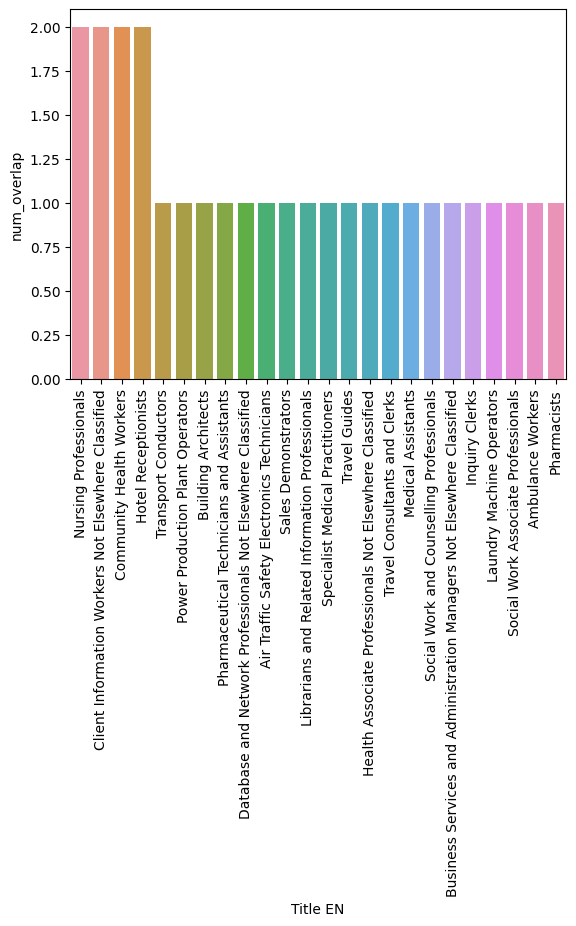

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

impacted_job = sorted_isco_task[sorted_isco_task['num_overlap'] != 0]
sns.barplot(x='Title EN', y='num_overlap', data=impacted_job)
plt.xticks(rotation='vertical')
plt.show()